# Linear Regression

In [5]:
# make linear data with Gaussian noise
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

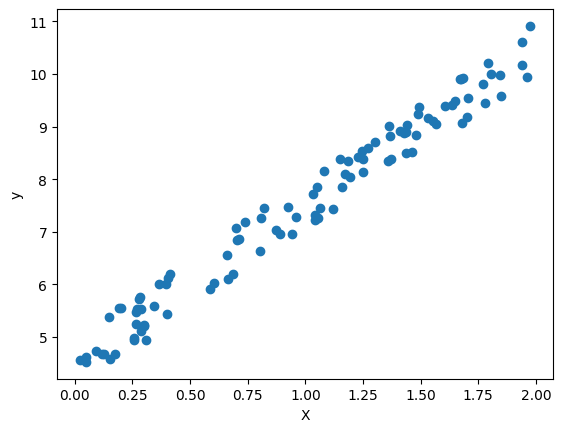

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Normal Equation

In [20]:
# add x_0 = 1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
X_b[:10]

array([[1.        , 0.20484952],
       [1.        , 0.26635145],
       [1.        , 1.41671056],
       [1.        , 1.23064155],
       [1.        , 0.77893977],
       [1.        , 1.38438424],
       [1.        , 0.91757285],
       [1.        , 0.81968108],
       [1.        , 0.46697135],
       [1.        , 1.49456964]])

In [21]:
# use Normal Equation to find the best fitting parameters
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.58841861],
       [2.91245725]])

In [22]:
# make a prediction
X_new = np.array([[0], [2]])  # 2 samples
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x_0 = 1 to each sample
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.58841861],
       [10.41333311]])

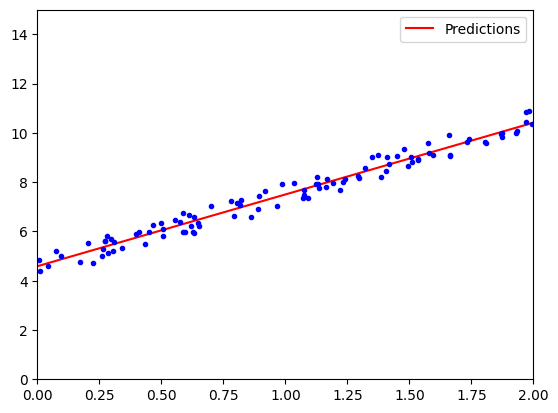

In [23]:
# plot regression
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

### Scikit-Learn Implementation

In [24]:
# define a linear regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.58841861]), array([[2.91245725]]))

In [25]:
lin_reg.predict(X_new)

array([[ 4.58841861],
       [10.41333311]])

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.58841861],
       [2.91245725]])

### Single Value Decomposition (Pseudoinversion)

In [27]:
np.linalg.pinv(X_b).dot(y)

array([[4.58841861],
       [2.91245725]])

### Gradient Descent

In [28]:
# implement batch gradient descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.58841861],
       [2.91245725]])

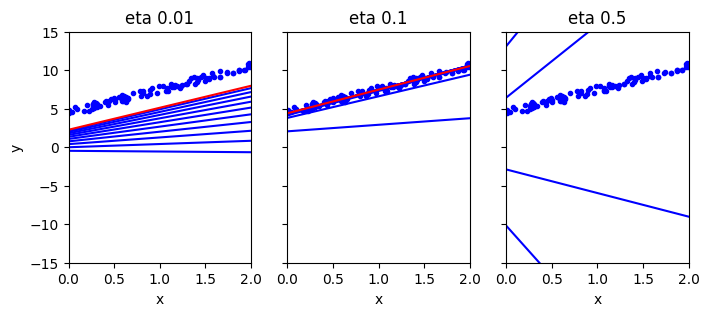

In [55]:
# effect of learning rate in gradient descent
etas = [0.01, 0.1, 0.5]
n_iterations = 30
fig, axs = plt.subplots(figsize=(8, 3), ncols=3, nrows=1, sharex='row', sharey='row', subplot_kw={'xlim': (0, 2), 'ylim': (-15, 15), 'ylabel': 'y', 'xlabel': 'x'})

for ax, eta in zip(axs, etas):
    ax.set_title(f"eta {eta}")
    ax.plot(X, y, 'b.')
    theta = np.random.randn(2, 1)
    for iteration in range(n_iterations):
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if iteration % 3 == 0:
            ax.plot(X_new, X_new_b.dot(theta), 'b-')
    ax.plot(X_new, X_new_b.dot(theta), 'r-')
plt.show()
plt.close()

### Stochastic Gradient Descent

In [56]:
# implement stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta   

array([[4.59002986],
       [2.92216643]])

In [57]:
# stochastic gradient descent for linear regression using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.5717036]), array([2.93114567]))

# Polynomial Regression

In [115]:
# make parabolic data with Gaussian noise
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

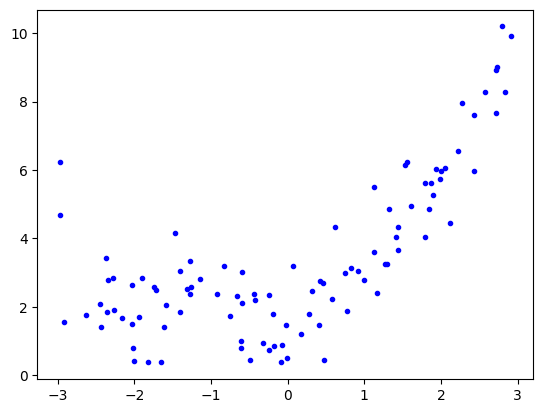

In [116]:
plt.plot(X, y, 'b.')
plt.show()

In [117]:
# create a new feature with the square of the original data
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.17743671]
[-0.17743671  0.03148379]


In [118]:
# fit a linear model to the dataset the includes powers of the original features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90395048]), array([[0.94649872, 0.53058371]]))

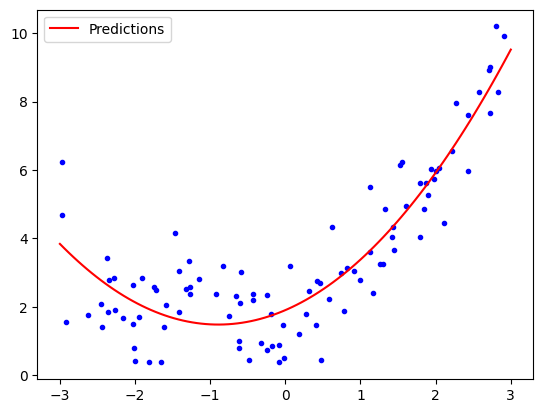

In [119]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly) 
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', label='Predictions')
plt.legend()
plt.show()

# Learning Curves

### Linear Model

In [122]:
# function to plot a learning curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-', lw=2, label='Train')
    plt.plot(np.sqrt(val_errors), 'b-', lw=2, label='Val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim(0, 3)
    plt.legend()

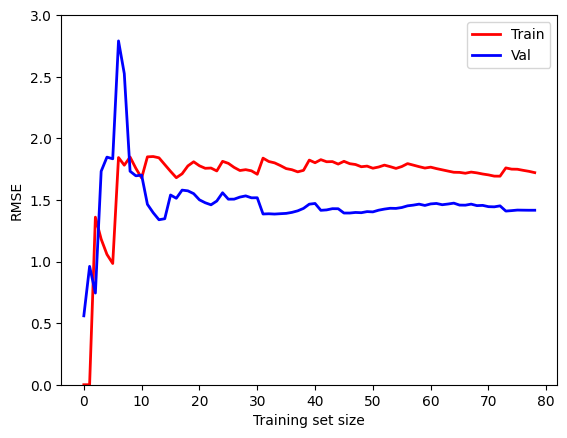

In [125]:
# fit a linear model to the quadratic data
# in underfitting, the training and validation curves get stuck at a plateau
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### 10 Degree Polynomial Model (without cross terms)

In [126]:
# make pipeline that computes the first 10 powers of the original feature
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

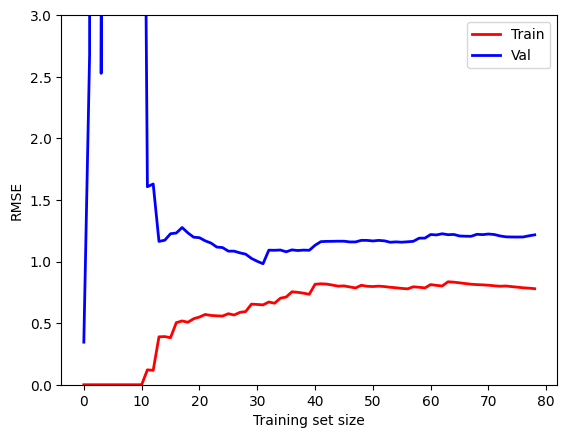

In [127]:
# plot learning curve for 10 order "polynomial" model
# in overfitting, the training set performs much better than in the validation 
plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models

### Ridge Regression

In [128]:
# train and predict a ridge linear regressor
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.80536524]])

In [129]:
# using stochastic gradient descent 
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.76828873])

### Lasso Regression

In [131]:
# train and predict a lasso linear regressor
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.75671036])

### Elastic Net

In [132]:
# train and predict an elastic net regressor
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.75875421])

# Early Stopping

In [141]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [142]:
# prepare the data
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [147]:
# define a stochastic gradient regressor without regularization
sgd_reg = SGDRegressor(
    max_iter=1,  # max number of epochs to iterate over when training
    tol=0, 
    warm_start=True,  # when the fit() method is called, it continues training where it left off
    penalty=None,  # no regularization
    learning_rate='constant',
    eta0=0.0005  # small learning rate
)

In [148]:
# fit one epoch of data multiple times. For each iteration save the training and validation RMSE.
# keep the best model, the best validation RMSE, and the number of epochs the gives the best validation RMSE.
# with stochastic gradient descent, iterating multiple M times over the a dataset with N entries
# is similar to having a dataset with N * M entries because it fits one sample at the time
minimum_val_error = float("inf")
best_epoch = None
best_model = None

rmse_train = []
rmse_val = []
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    train_error = mean_squared_error(y_train, y_train_predict)
    
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    rmse_val.append(np.sqrt(val_error))
    rmse_train.append(np.sqrt(train_error))
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached be

/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached be

/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/sebastian/Documents/GitHub/study/study_env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached be

In [150]:
best_epoch, best_model, minimum_val_error

(471,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=0, warm_start=True),
 1.1021754051540484)

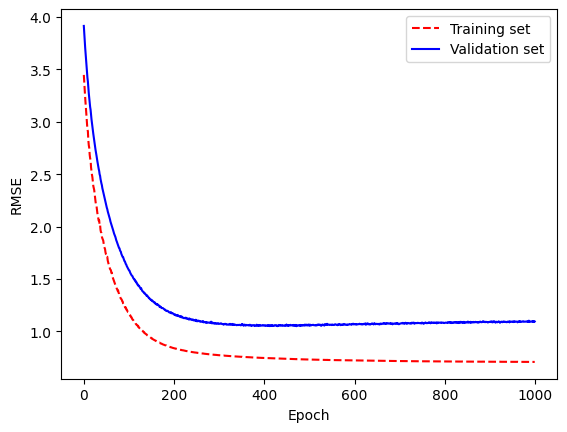

In [154]:
# plot the training and validation RMSE as the model is fed "more" data ("more", because it is actually the same data multiple times)
# the best model is the one with the smallest generalized error (i.e. validation RMSE)
plt.plot(range(1000), rmse_train, 'r--', label='Training set')
plt.plot(range(1000), rmse_val, 'b-', label='Validation set')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Logistic Regression

In [1]:
# load Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [7]:
# split features and labels
X = iris['data'][:, 3:]  # grabs only petal width
y = (iris['target'] == 2).astype(np.int)  # 1 if Iris virginica, else 0

/var/folders/rx/y661s_v17xsf84wp1l5rc16h0000gn/T/ipykernel_15056/2877987205.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int)


In [9]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [10]:
# predict probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

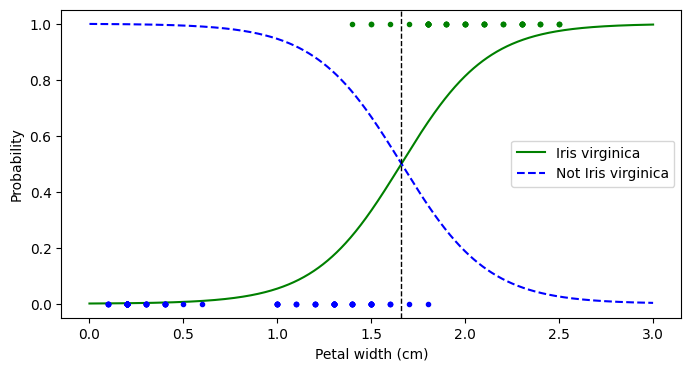

In [41]:
plt.figure(figsize=(8, 4))
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not Iris virginica")
plt.plot(X.flatten()[y.astype(bool)], np.ones_like(X.flatten()[y.astype(bool)]), 'g.')
plt.plot(X.flatten()[~y.astype(bool)], np.zeros_like(X.flatten()[~y.astype(bool)]), 'b.')
plt.axvline(1.66, 0, 1, ls='--', color='k', lw=1)
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.show()

# Softmax Regression

In [42]:
# get petal width and length as features
X = iris['data'][:, (2, 3)]
y = iris['target']

In [43]:
# fit a softwax regression classifier with l2 regularization
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [44]:
# make a prediction
softmax_reg.predict([[5, 2]])

array([2])

In [45]:
# get the probabilities of the prediction
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])